<a href="https://colab.research.google.com/github/HEMA1188/GuviAssignment5_6_7/blob/main/Boston_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv("housing.csv", header=None, delimiter=r"\s+", names=column_names)

df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_normalized = (df - df.mean()) / df.std()

In [ ]:
df_normalized.cov()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


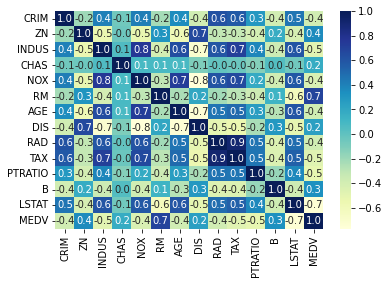

In [ ]:

sns.color_palette("crest", as_cmap=True)
sns.heatmap(df_normalized.cov(), annot=True, fmt=".1f", cmap="YlGnBu")

In [ ]:
X = df[['LSTAT','RM','PTRATIO']] #select feature
y = df[['MEDV']].values   #select target var
y = y.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [ ]:
#create linear regression object
lm = LinearRegression() 
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#the mean squared error,lower the value better, if it is a .0 means perfect prediction
s = mean_squared_error(y_train,y_train_pred)
print("Mean Squared error of training set :%2f"%s)

Mean Squared error of training set :27.687245


In [ ]:
s = mean_squared_error(y_test,y_test_pred)
print("Mean squared error of testing set: %.2f"%s)

Mean squared error of testing set: 26.01


In [ ]:
from sklearn.metrics import r2_score

# Explained variance score: 1 is perfect prediction
s = r2_score(y_train, y_train_pred)
print('R2 variance score of training set: %.2f' %s )

R2 variance score of training set: 0.69


In [ ]:
#explained the variance score :1 is perfect prediction
s = r2_score(y_test,y_test_pred)
print("R2 variance score of testing set: %2f"%s)

R2 variance score of testing set: 0.650904


In [ ]:
#calculating adjusted r2
N = y_test.size
p = X_train.shape[1]
adjr2score = 1 - ((1-r2_score(y_test, y_test_pred))*(N - 1))/ (N - p - 1)
print("Adjusted R^2 Score %.2f" % adjr2score)

Adjusted R^2 Score 0.64


Applying GradientDescent

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()

In [ ]:
X_std.shape

(506, 3)

In [ ]:
import numpy as np
alpha = 0.0001    #learning rate
w_ = np.zeros(1 + X_std.shape[1])    
cost_ = [] 
n_ = 100
 
for i in range(n_):
    y_pred = np.dot(X_std,w_[1:] + w_[0])
    errors  = (y_std - y_pred)
    
    w_[1:] +=alpha * X_std.T.dot(errors)   #theta1
    w_[0] +=alpha *errors.sum()        #theta0
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

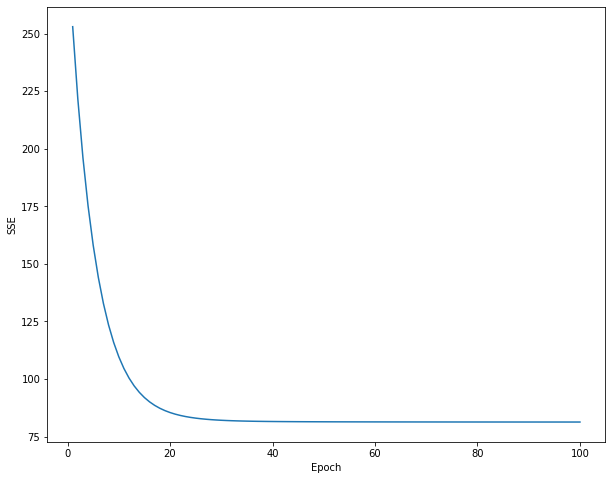

In [ ]:
plt.figure(figsize=(10,8))  #plot the figure
plt.plot(range(1,n_ + 1),cost_);
plt.ylabel('SSE');
plt.xlabel('Epoch');

In [ ]:
w_

array([-3.60493857e-15, -4.36226187e-01,  3.50971560e-01, -2.21282908e-01])

In [ ]:
#accuracy of gradient function
print("Accuracy: %0.2f (+/- %0.2f)" % (w_.mean(), w_.std() * 2))

Accuracy: -0.08 (+/- 0.58)
